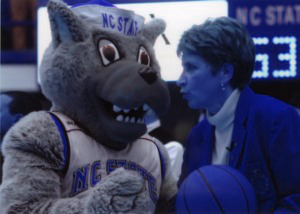

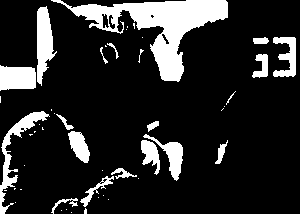

Elapsed Time for CPU Processing: 0.08162426948547363 seconds
Elapsed Time for GPU Processing: 0.003264188766479492 seconds


In [10]:
import cv2
import tensorflow as tf
import time
from skimage import io
from google.colab.patches import cv2_imshow # برای نمایش تصویر

# تصویر را بارگذاری می کنیم
img = io.imread('https://iiif.lib.ncsu.edu/iiif/0016007/full/300,/0/default.jpg')

# تصویر را به یک تانسور تنسورفلوو تبدیل می کنیم
img_tensor = tf.convert_to_tensor(img)

# تانسور را به حافظه جی پی یو منتقل می کنیم
with tf.device('/gpu:0'):
    img_tensor_gpu = tf.identity(img_tensor)

# زمان شروع پردازش سی پی یو را ثبت می کنیم
cpu_start_time = time.time()

# پردازش تصویر را روی سی پی یو انجام می دهیم
gray_tensor = tf.image.rgb_to_grayscale(img_tensor)
thresholded_tensor = tf.where(gray_tensor > 127, 255, 0)

# زمان پایان پردازش سی پی یو را ثبت می کنیم
cpu_end_time = time.time()

# زمان سپری شده برای پردازش سی پی یو را محاسبه می کنیم
cpu_elapsed_time = cpu_end_time - cpu_start_time

# زمان شروع پردازش جی پی یو را ثبت می کنیم
with tf.device('/gpu:0'):
    gpu_start_time = time.time()

 # پردازش تصویر را روی چی پی یو انجام می دهیم
    gray_tensor_gpu = tf.image.rgb_to_grayscale(img_tensor_gpu)
    thresholded_tensor_gpu = tf.where(gray_tensor_gpu > 127, 255, 0)

# زمان پایان پردازش چی پی یو را ثبت می کنیم
    gpu_end_time = time.time()

# زمان سپری شده برای پردازش چی پی یو را محاسبه می کنیم
gpu_elapsed_time = gpu_end_time - gpu_start_time

# تانسور آستانه ای را به حافظه سی پی یو برمی گردانیم
thresholded_tensor = thresholded_tensor_gpu.numpy()

# نمایش تصاویر اصلی و پردازش شده
cv2_imshow(img)
cv2_imshow(thresholded_tensor)
cv2.waitKey(0)
cv2.destroyAllWindows()

# زمان های سپری شده برای پردازش سی پی یو و جی پی یو راچاپ می کنیم
print('Elapsed Time for CPU Processing: {} seconds'.format(cpu_elapsed_time))
print('Elapsed Time for GPU Processing: {} seconds'.format(gpu_elapsed_time))
